In [1]:
import pandas as pd
df = pd.read_csv("c:/data/mart/mart.csv")
df.head()

,seoul,incheon,gyungi,male,female,age10,age2030,age4050,age60,food,...,product,max_ta,max_ws,min_ta,avg_ta,avg_rhm,avg_ws,sum_rn,amount,class
0,1,0,0,0,1,1,0,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,7,0
1,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,655,1
2,1,0,0,0,1,0,1,0,0,1,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,282,1
3,1,0,0,0,1,0,1,0,0,0,...,1,4.0,3.5,-3.3,1.2,73,1.6,0.0,35,0
4,1,0,0,0,1,0,1,0,0,0,...,0,4.0,3.5,-3.3,1.2,73,1.6,0.0,183,1


In [3]:
train_cols = df.columns[:-2]
X = df[train_cols] # 독립변수
y = df["class"] # 종속변수

In [4]:
df.columns

Index(['seoul', 'incheon', 'gyungi', 'male', 'female', 'age10', 'age2030',
       'age4050', 'age60', 'food', 'drink', 'product', 'max_ta', 'max_ws',
       'min_ta', 'avg_ta', 'avg_rhm', 'avg_ws', 'sum_rn', 'amount', 'class'],
      dtype='object')

In [5]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [18]:
df_samp["Label"].value_counts()

0    5230
1    5230
Name: Label, dtype: int64

In [19]:
X=df_samp[train_cols]
y=df_samp["Label"]

In [20]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 모델의 설명력 62%
# citations 변수는 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.237662
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.657    
Dependent Variable:   Label              AIC:                5049.8884
Date:                 2022-06-03 15:34   BIC:                5332.8457
No. Observations:     10460              Log-Likelihood:     -2485.9  
Df Model:             38                 LL-Null:            -7250.3  
Df Residuals:         10421              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
age                 -0.0020   0.0068  -0.2898 0.7720  -0.0152   0.0113
hei

In [6]:
# citations 변수를 제거한 모형
cols=[ 'seoul', 'incheon', 'gyungi', 'male', 'female', 'age10', 'age2030',
       'age4050', 'age60', 'food', 'drink', 'product', 'max_ta', 'max_ws',
       'min_ta', 'avg_ta', 'avg_rhm', 'avg_ws', 'sum_rn', 'amount'
      ]
X=df_samp[cols]
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 양의 상관관계: international_students 외국인학생수, research 연구능력
# 음의 상관관계: student_staff_ratio 교수 1인당 담당학생수가 적으면 우수한 학교

KeyError: "['amount'] not in index"

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(random_state=0)),])
params = {
'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

c:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'clf__C': 0.0001}
0.8464333333333333


In [9]:
# 다양한 알고리즘별 정확도를 저장할 리스트
scores=[]

In [10]:
scores.append(grid.best_score_)
scores

[0.8464333333333333]

In [11]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    # 같은 조건으로 실행해야 함
('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=0)),])
params = {
'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3}
0.5522333333333334


In [12]:
scores.append(grid.best_score_)
scores

[0.8464333333333333, 0.5522333333333334]

In [13]:
tree=grid.best_estimator_['clf']

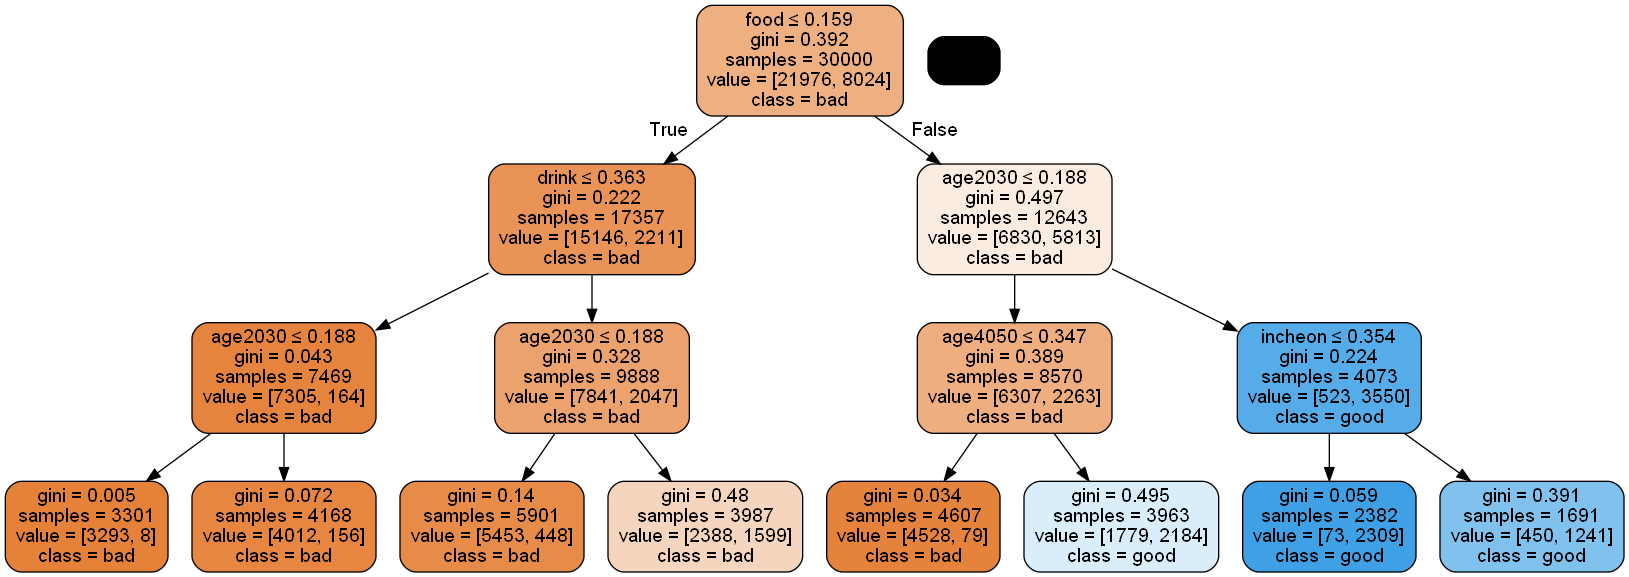

In [14]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
feature_names=train_cols, class_names=["bad","good"],
filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

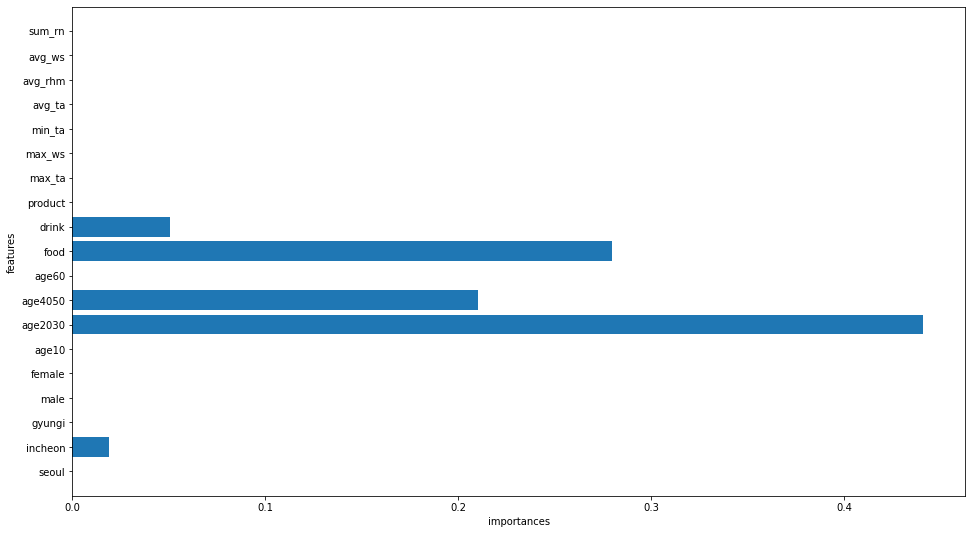

In [15]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 (0 ~ 1 사이의 값 전혀 사용되지 않음 완벽하게 타겟 클래스 예측)
import numpy as np
import matplotlib.pyplot as plt
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)
# : teaching > research

In [16]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),])
params = {
'clf__max_depth': list(range(3,6)),
'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 3, 'clf__n_estimators': 30}
0.6899333333333333


In [17]:
scores.append(grid.best_score_)
scores

[0.8464333333333333, 0.5522333333333334, 0.6899333333333333]

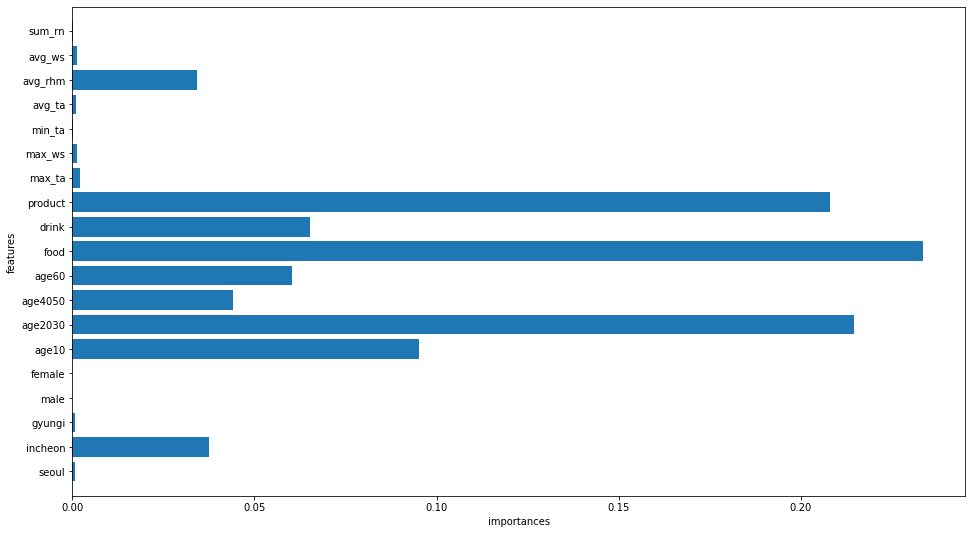

In [18]:
rf=grid.best_estimator_['clf']
plot_tree(rf)
# teaching > research

In [19]:
#knn
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', KNeighborsClassifier()),
])
params = {
'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__n_neighbors': 9}
0.4661666666666666


In [20]:
scores.append(grid.best_score_)
scores

[0.8464333333333333,
 0.5522333333333334,
 0.6899333333333333,
 0.4661666666666666]

In [21]:
#인공신경망
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
'clf__hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
'clf__activation': ['tanh', 'relu'],
'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100, 100)}
0.5522333333333335


In [22]:
scores.append(grid.best_score_)
scores

[0.8464333333333333,
 0.5522333333333334,
 0.6899333333333333,
 0.4661666666666666,
 0.5522333333333335]

In [23]:
#svm
from sklearn.svm import SVC
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', SVC(random_state=0)),
])
params = {
'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
'clf__gamma': [0.0001, 0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__C': 0.01, 'clf__gamma': 0.1}
0.7623000000000001


In [24]:
scores.append(grid.best_score_)
scores

[0.8464333333333333,
 0.5522333333333334,
 0.6899333333333333,
 0.4661666666666666,
 0.5522333333333335,
 0.7623000000000001]

 최적의 알고리즘: LOGIT
 최적의 정확도: 0.8464333333333333


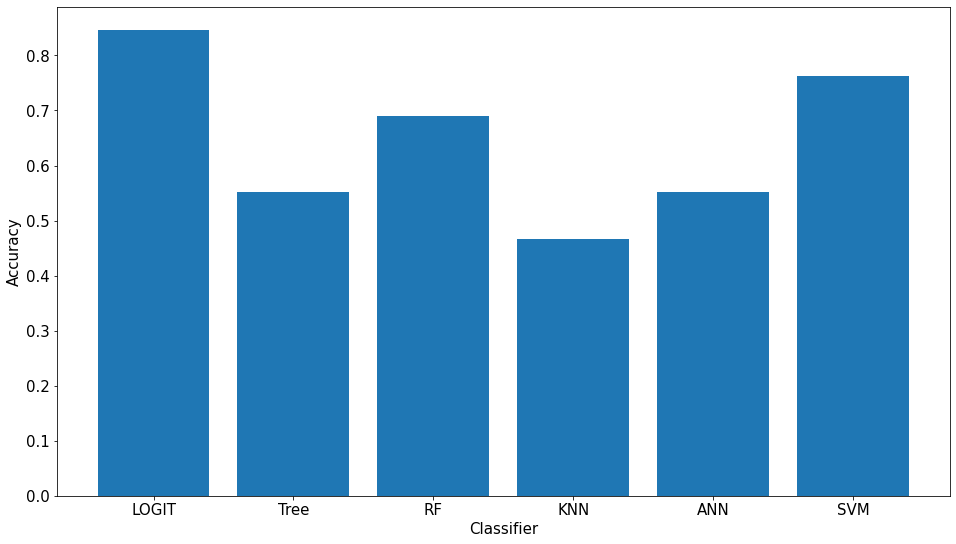

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.84643333 0.55223333 0.68993333 0.46616667 0.55223333 0.7623    ]


In [29]:
#알고리즘별 예측도 그래프
methods=["LOGIT","Tree","RF","KNN","ANN","SVM"]
scores_arr=np.array(scores) #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스
print(" 최적의 알고리즘:",methods[idx])
print(" 최적의 정확도:",max_rate) 
plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()
print(methods)
print(scores_arr)